## Data Exploration

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Import datasets

df_mat = pd.read_csv("student\student-mat.csv", sep=';')
df_por = pd.read_csv("student\student-por.csv", sep=';')

In [3]:
# preview our datasets
print(df_mat.head())
print(df_por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [4]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Data Cleaning

The datasets seem to have been already cleaned. We are told there are no missing values. So we will go direct into analysing

## Statistical Analysis

In [6]:
# Compute descriptive statistics for each dataset
mat_descriptive_stats = df_mat.describe()
por_descriptive_stats = df_por.describe()

mat_descriptive_stats, por_descriptive_stats


(              age        Medu        Fedu  traveltime   studytime    failures  \
 count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
 mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
 std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
 min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
 25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
 50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
 75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
 max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   
 
            famrel    freetime       goout        Dalc        Walc      health  \
 count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
 mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
 std      0.89

In [13]:
# Compute correlation matrices for both datasets
mat_corr = df_mat.corr(numeric_only=True)
por_corr = df_por.corr(numeric_only=True)

# Extract correlations of G3 with other attributes
mat_corr_g3 = mat_corr["G3"].sort_values(ascending=False)
por_corr_g3 = por_corr["G3"].sort_values(ascending=False)

print("Mathematics  G3 Correlations:\n", mat_corr_g3)
print("Portuguese  G3 Correlations:\n", por_corr_g3)

Mathematics  G3 Correlations:
 G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64
Portuguese  G3 Correlations:
 G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64


## Statistical visualization

We will focus in visualizing the grades because they are our target variables and main variables of analysis

In [9]:
# List of grades
grades = ["G1", "G2", "G3"]

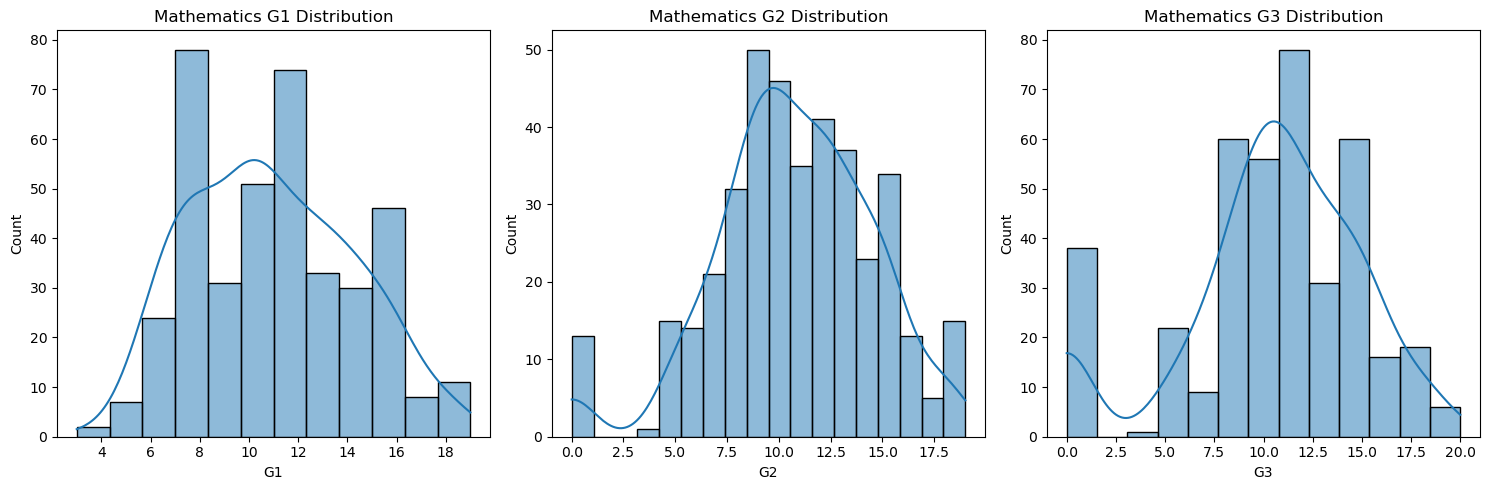

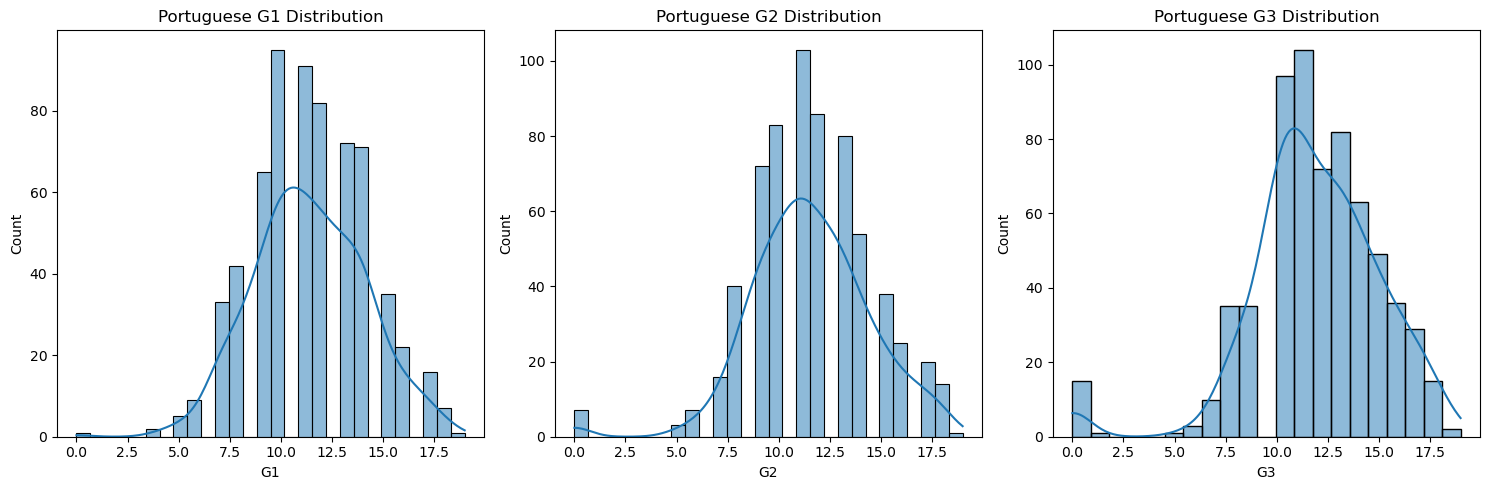

In [10]:
# Creating histograms
for dataset, subject in [(df_mat, "Mathematics"), (df_por, "Portuguese")]:
    plt.figure(figsize=(15, 5))
    for i, grade in enumerate(grades):
        plt.subplot(1, 3, i+1)
        sns.histplot(dataset[grade], kde=True)
        plt.title(f'{subject} {grade} Distribution')
    plt.tight_layout()
    plt.show()

We see an imperfect normal distribution for all grades

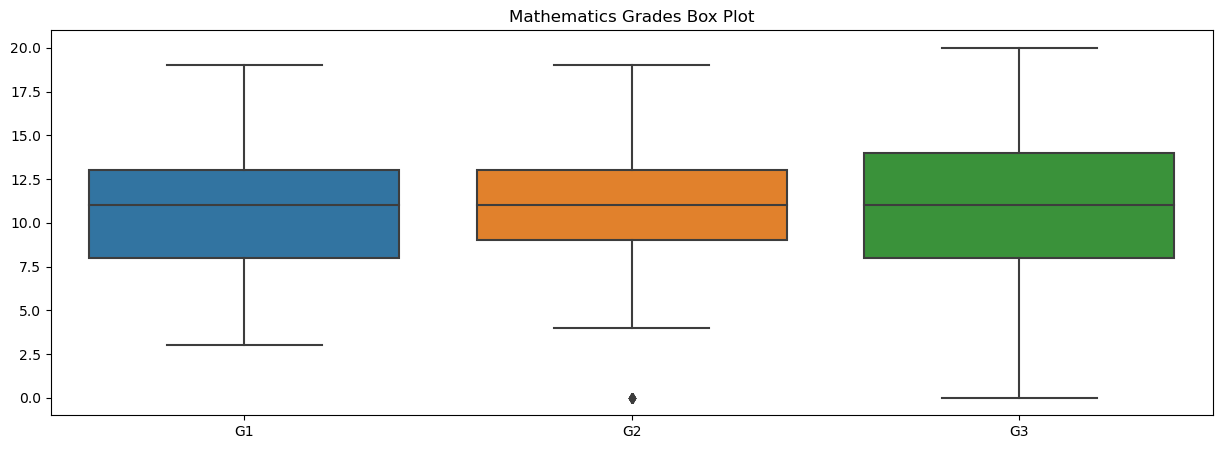

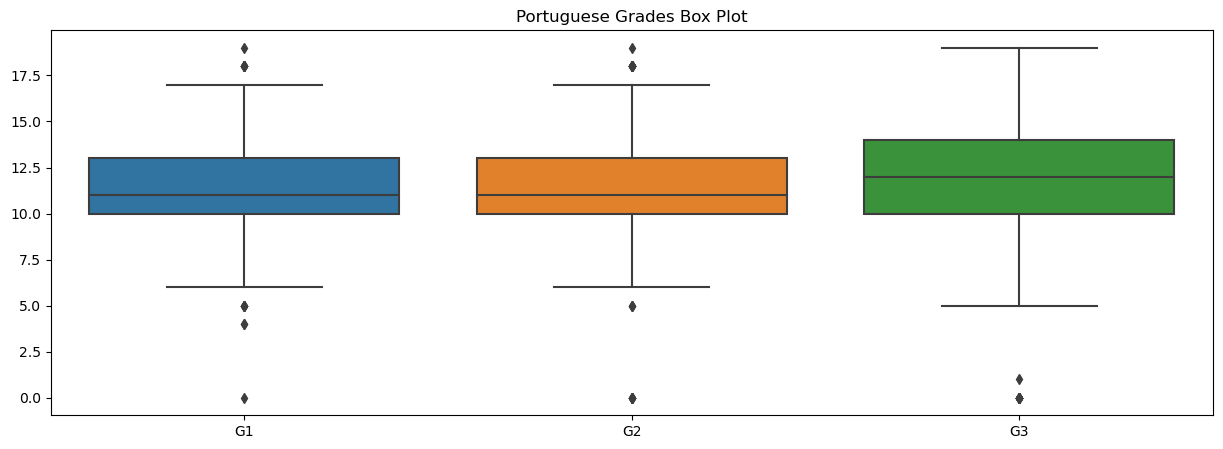

In [11]:
# Creating box plots
for dataset, subject in [(df_mat, "Mathematics"), (df_por, "Portuguese")]:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=dataset[grades])
    plt.title(f'{subject} Grades Box Plot')
    plt.show()

Portoguese has more outlies compared to MAthematics. Otherwise both seem normaly distributed

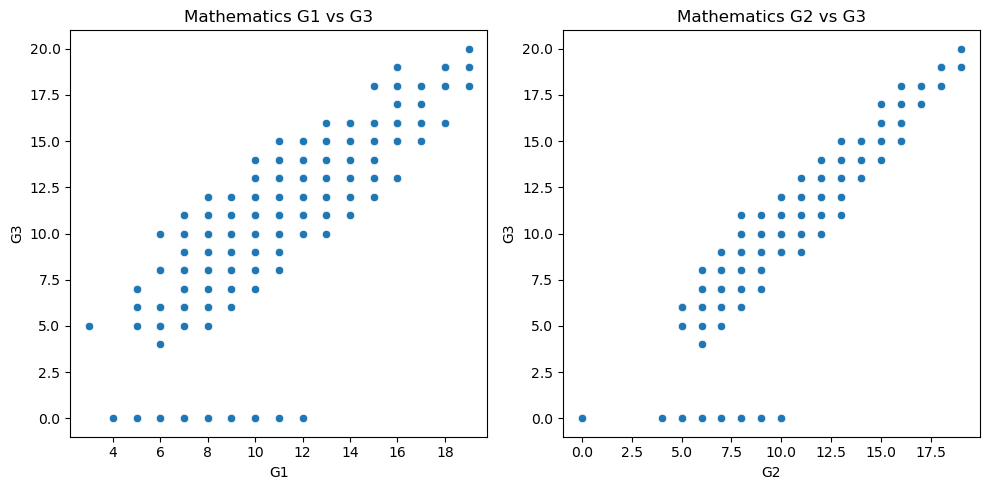

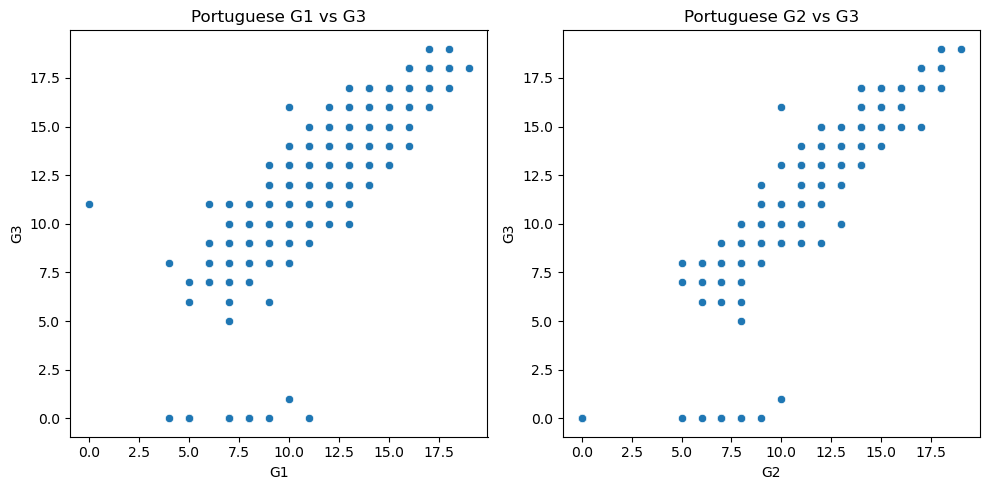

In [12]:
# Creating scatter plots
for dataset, subject in [(df_mat, "Mathematics"), (df_por, "Portuguese")]:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=dataset["G1"], y=dataset["G3"])
    plt.title(f'{subject} G1 vs G3')
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=dataset["G2"], y=dataset["G3"])
    plt.title(f'{subject} G2 vs G3')
    plt.tight_layout()
    plt.show()

By vision, both grade 1 and grade 2 have a more positive correlation to grade 3

## Regression

We'll create two models one that includes all attributes including G1 and G2, and another that excludes G1 and G2. 

In [14]:
# loading libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Mathematics

In [15]:
# Prepare data including G1 and G2
X = df_mat.drop(columns=["G3"])
y = df_mat["G3"]
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train and evaluate the model including G1 and G2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model including G1 and G2:\nMSE: {mse:.2f}, R2: {r2:.2f}")

Model including G1 and G2:
MSE: 5.66, R2: 0.72


In [18]:
# Prepare data excluding G1 and G2
X = df_mat.drop(columns=["G3", "G1", "G2"])
y = df_mat["G3"]
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train and evaluate the model excluding G1 and G2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model excluding G1 and G2:\nMSE: {mse:.2f}, R2: {r2:.2f}")

Model excluding G1 and G2:
MSE: 17.60, R2: 0.14


The model including G1 and G2 is significantly better than the model excluding G1 and G2. The lower MSE and higher R2 values indicate that the inclusion of G1 and G2 provides valuable information for predicting the final grade (G3), leading to a better fit to the data.

### Portoguese

In [21]:
# Prepare data including G1 and G2
X = df_por.drop(columns=["G3"])
y = df_por["G3"]
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train and evaluate the model including G1 and G2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model including G1 and G2:\nMSE: {mse:.2f}, R2: {r2:.2f}")

Model including G1 and G2:
MSE: 1.48, R2: 0.85


In [23]:
# Prepare data excluding G1 and G2
X = df_por.drop(columns=["G3", "G1", "G2"])
y = df_por["G3"]
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train and evaluate the model excluding G1 and G2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model excluding G1 and G2:\nMSE: {mse:.2f}, R2: {r2:.2f}")

Model excluding G1 and G2:
MSE: 8.19, R2: 0.16


We observe the same for Portogues. Including G1 and G2 gives a better fit of lower MSE and higher R2.